<a href="https://colab.research.google.com/github/Huy987asd/BT/blob/main/DC_AC_motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

150.00000000000003


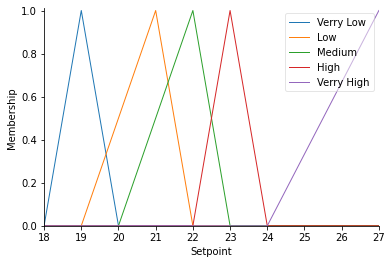

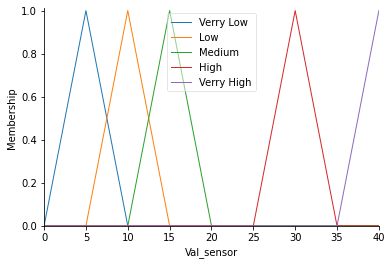

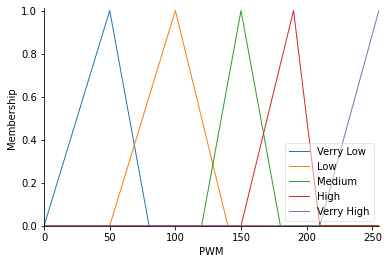

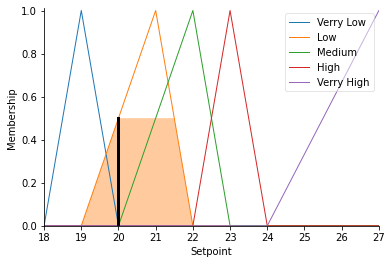

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Setpoint = ctrl.Antecedent(np.arange(18, 28, 1), 'Setpoint')
Val_sensor = ctrl.Antecedent(np.arange(0, 41, 1), 'Val_sensor')
PWM = ctrl.Consequent(np.arange(0, 256, 1), 'PWM')

Setpoint['Verry Low'] = fuzz.trimf(Setpoint.universe,[18,19,20])
Setpoint['Low'] = fuzz.trimf(Setpoint.universe,[19,21,22])
Setpoint['Medium'] = fuzz.trimf(Setpoint.universe,[20,22,23])
Setpoint['High'] = fuzz.trimf(Setpoint.universe,[22,23,24])
Setpoint['Verry High'] = fuzz.trimf(Setpoint.universe,[24,27,27])
Val_sensor['Verry Low'] = fuzz.trimf(Val_sensor.universe,[0,5,10])
Val_sensor['Low'] = fuzz.trimf(Val_sensor.universe,[5,10,15])
Val_sensor['Medium'] = fuzz.trimf(Val_sensor.universe,[10,15,20])
Val_sensor['High'] = fuzz.trimf(Val_sensor.universe,[25,30,35])
Val_sensor['Verry High'] = fuzz.trimf(Val_sensor.universe,[35,40,40])
PWM['Verry Low'] = fuzz.trimf(PWM.universe,[0,50,80])
PWM['Low'] = fuzz.trimf(PWM.universe,[50,100,140])
PWM['Medium'] = fuzz.trimf(PWM.universe,[120,150,180])
PWM['High'] = fuzz.trimf(PWM.universe,[150,190,210])
PWM['Verry High'] = fuzz.trimf(PWM.universe,[210,255,255])
Setpoint.view()
Val_sensor.view()
PWM.view()

rule1 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['Verry Low'], PWM['Verry Low'])
rule2 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['Low'], PWM['Verry Low'])
rule3 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['Medium'], PWM['Low'])
rule4 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['High'], PWM['Medium'])
rule5 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['Verry High'], PWM['Medium'])
rule6 = ctrl.Rule(Setpoint['Low']& Val_sensor['Verry Low'], PWM['Verry Low'])
rule7 = ctrl.Rule(Setpoint['Low']& Val_sensor['Low'], PWM['Low'])
rule8 = ctrl.Rule(Setpoint['Low']& Val_sensor['Medium'], PWM['Low'])
rule9 = ctrl.Rule(Setpoint['Low']& Val_sensor['High'], PWM['Medium'])
rule10 = ctrl.Rule(Setpoint['Low']& Val_sensor['Verry High'], PWM['High'])
rule11 = ctrl.Rule(Setpoint['Medium']& Val_sensor['Verry Low'], PWM['Verry Low'])
rule12 = ctrl.Rule(Setpoint['Medium']& Val_sensor['Low'], PWM['Low'])
rule13 = ctrl.Rule(Setpoint['Medium']& Val_sensor['Medium'], PWM['Medium'])
rule14 = ctrl.Rule(Setpoint['Medium']& Val_sensor['High'], PWM['Medium'])
rule15 = ctrl.Rule(Setpoint['Medium']& Val_sensor['Verry High'], PWM['High'])
rule16 = ctrl.Rule(Setpoint['High']& Val_sensor['Verry Low'], PWM['Low'])
rule17 = ctrl.Rule(Setpoint['High']& Val_sensor['Low'], PWM['Medium'])
rule18 = ctrl.Rule(Setpoint['High']& Val_sensor['Medium'], PWM['Medium'])
rule19 = ctrl.Rule(Setpoint['High']& Val_sensor['High'], PWM['High'])
rule20 = ctrl.Rule(Setpoint['High']& Val_sensor['Verry High'], PWM['High'])
rule21 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['Verry Low'], PWM['Medium'])
rule22 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['Low'], PWM['Medium'])
rule23 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['Medium'], PWM['High'])
rule24 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['High'], PWM['High'])
rule25 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['Verry High'], PWM['Verry High'])
PWMS_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
PWMS = ctrl.ControlSystemSimulation(PWMS_ctrl)
PWMS.input['Setpoint'] = 20
PWMS.input['Val_sensor'] = 30

PWMS.compute()
print(PWMS.output['PWM'])
Setpoint.view(sim = PWMS)





In [2]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d8f805bc1ec6416347bd750bc6a77fa8e2690f1d75e130fa21c8864c84371728
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
